In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/Flask_Simple_Crypt-0.3.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/Flask_Simple_Crypt-0.3.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/Flask_Simple_Crypt-0.3.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/Flask_Simple_Crypt-0.3.3-py3

In [2]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [3]:
bank_churn_data = pd.read_csv("bank_churn_data.csv")
bank_churn_data.head()


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
bank_churn_data.dtypes


user_id                       int64
attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [5]:
bank_churn_data.shape

(10127, 21)

In [6]:
bank_churn_data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [7]:
bank_churn_data = bank_churn_data.dropna()

Text(0.5, 1.0, 'Distribution of Customer Age')

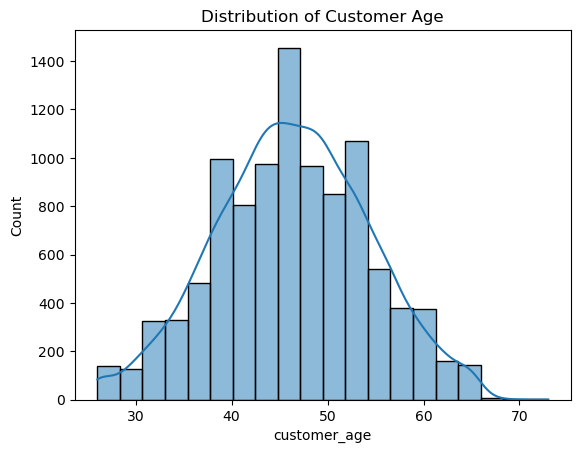

In [8]:
sns.histplot(bank_churn_data['customer_age'], kde=True, bins=20)
plt.title('Distribution of Customer Age')

Text(0.5, 1.0, 'Age Distribution vs Churn')

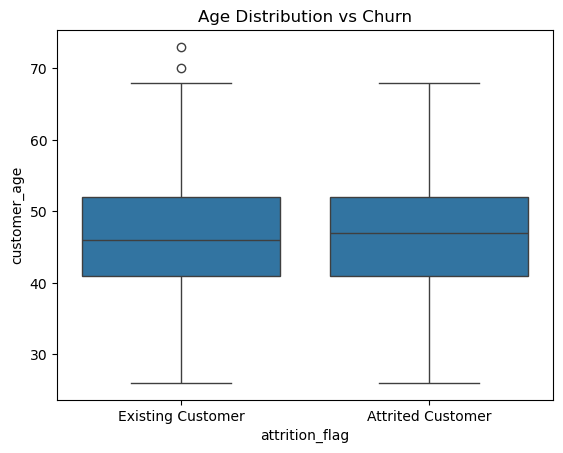

In [9]:
# Churn distribution by age
sns.boxplot(x='attrition_flag', y='customer_age', data=bank_churn_data)
plt.title('Age Distribution vs Churn')

In [10]:
bank_churn_data_encoded = bank_churn_data.copy()
bank_churn_data_encoded['education_level'] = bank_churn_data_encoded['education_level'].astype('category').cat.codes
bank_churn_data_encoded['income_category'] = bank_churn_data_encoded['income_category'].astype('category').cat.codes

Text(0.5, 1.0, 'Correlation between Education Level and Income Category')

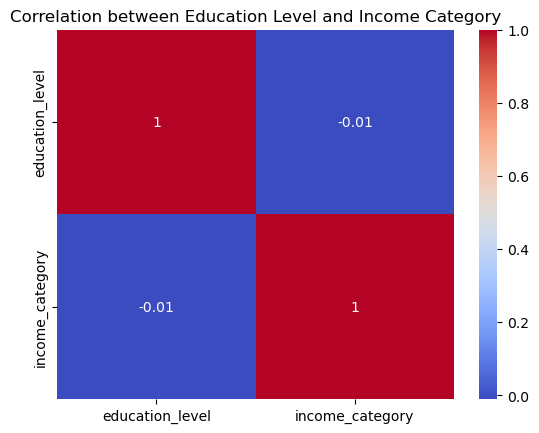

In [11]:
# Correlation between education level and income category
sns.heatmap(bank_churn_data_encoded[['education_level', 'income_category']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Education Level and Income Category')

Text(0.5, 1.0, 'Gender vs Churn')

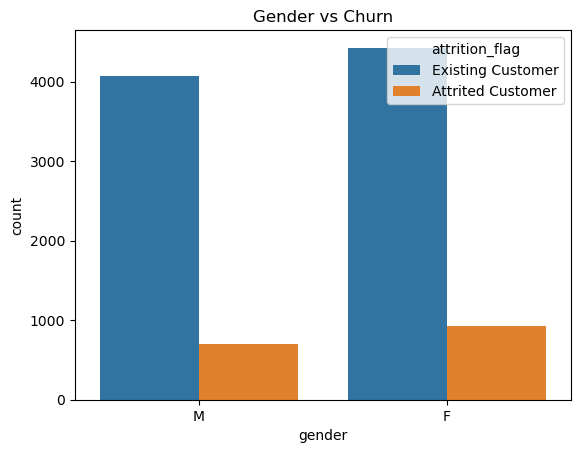

In [12]:
# Gender vs Churn
sns.countplot(x='gender', hue='attrition_flag', data=bank_churn_data)
plt.title('Gender vs Churn')

Text(0.5, 1.0, 'Months on Book vs Churn')

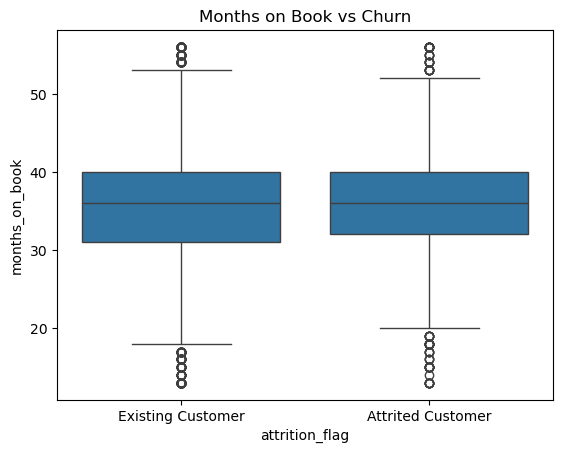

In [13]:
# Relationship Between Customer Tenure and Churn
sns.boxplot(x='attrition_flag', y='months_on_book', data=bank_churn_data)
plt.title('Months on Book vs Churn')

Text(0.5, 1.0, 'Contacts Count in Last 12 Months vs Churn')

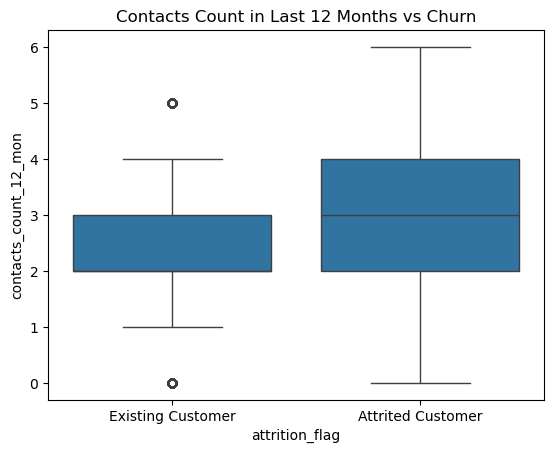

In [14]:
#Contacts Count and Churn Impact
sns.boxplot(x='attrition_flag', y='contacts_count_12_mon', data=bank_churn_data)
plt.title('Contacts Count in Last 12 Months vs Churn')

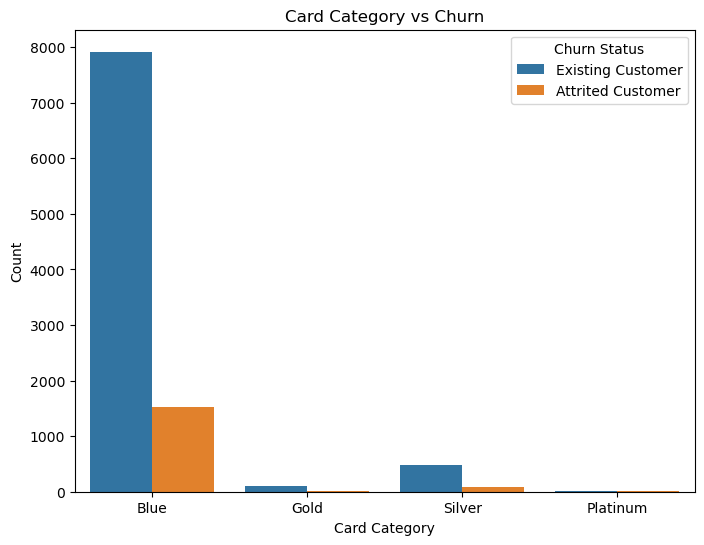

In [16]:
# Card Category vs Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='card_category', hue='attrition_flag', data=bank_churn_data)
plt.title('Card Category vs Churn')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.legend(title='Churn Status', loc='upper right')
plt.show()


In [41]:
columns_to_drop = ['user_id', 'attrition_flag', 'gender', 'marital_status']
X_cleaned = bank_churn_data.drop(columns=columns_to_drop)

X_encoded = pd.get_dummies(X_cleaned, columns=['education_level', 'income_category', 'card_category'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.select_dtypes(include=[np.number]))

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.select_dtypes(include=[np.number]).columns)
non_numeric_columns = X_encoded.drop(X_encoded.select_dtypes(include=[np.number]).columns, axis=1)
X_final = pd.concat([X_scaled_df, non_numeric_columns], axis=1)

X_final.head()


,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,...,education_level_Uneducated,education_level_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,False,False,False,True,False,False,False,False,False,False
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,False,False,False,False,False,True,False,False,False,False
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,False,False,False,False,True,False,False,False,False,False
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,False,False,False,False,False,True,False,False,False,False
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,True,False,False,True,False,False,False,False,False,False


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_cleaned, test_size=0.3, stratify=y_cleaned, random_state=1000)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7088, 28) (3039, 28) (7088,) (3039,)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import scikitplot as skplt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1000)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
skplt.metrics.plot_roc_curve(y_test, rf_model.predict_proba(X_test))
plt.title("ROC Curve - Random Forest")
plt.show()


Random Forest Accuracy: 0.9489963803882856
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2551
           1       0.90      0.77      0.83       488

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039

